In [2]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.7 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.42.1-py3-n

#An example code for three-qubit Bit-flip error correcting code

Here is the code to simulate the 3-qubit error correcting code with an X error on the second qubit:

{'000': 1024}


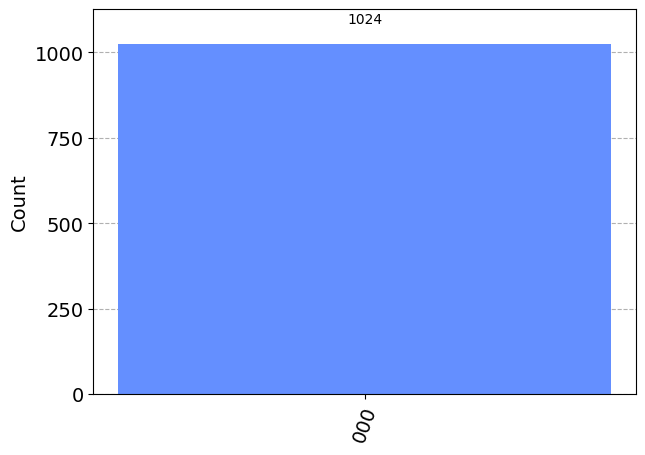

In [19]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer import QasmSimulator

# Create the three qubits
q = QuantumRegister(3, 'q')

# Create the three classical bits for storing the syndrome
c = ClassicalRegister(3, 'c')

# Create the error correction circuit
error = QuantumCircuit(q, c)

# Apply the bit-flip error on the second qubit
error.x(q[1])

# Create the code for error correction
code = QuantumCircuit(q, c)

# Apply the CNOT gate to detect the error
code.cx(q[0], q[1])
code.cx(q[1], q[2])

# Measure the qubits to obtain the syndrome
code.measure(q[0], c[0])
code.measure(q[1], c[1])
code.measure(q[2], c[2])

# Correct the error
correction = QuantumCircuit(q, c)

if c[2] == 1:
    correction.x(q[2])
if c[1] == 1:
    correction.x(q[1])
if c[0] == 1:
    correction.x(q[0])

# Combine the error, code, and correction circuits
# circuit = error + code + correction

circuit = code.compose(error, range(3))
circuit = circuit.compose(correction, range(3))

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

# Print the counts
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)


The output of this code should be {'000': 1024} which indicates that the error has been corrected and the original state of the qubits has been restored.

#Test this method on DJ algorithm!

we will run our Deutsch-Josza theoretically, on the quantum simulator as in the first step, but this time with an induced bit flip error.

In [305]:
!pip install qutip
!pip install Qconfig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{'000000': 1024}


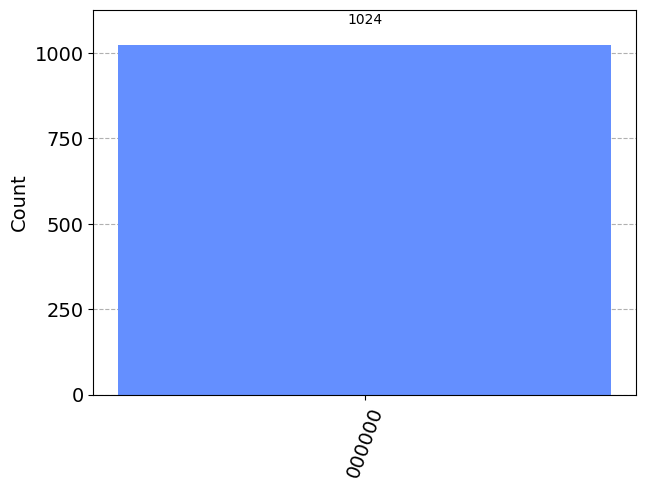

In [310]:
# from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
# from qiskit.backends import local_backends, remote_backends
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qutip import *
from IPython.display import display, HTML
# import Qconfig
import numpy as np
import matplotlib.pyplot as plt
# run circuit with single bit-flip error & 3-qubits correction on local quantum simulator

# 6 qubits Deutsch-Josza for 2-qubits version (w/ 5 qubits for error correction for the |psi> state)
n = 6

# initialize quantum and classical registers

q2 = QuantumRegister(n, 'q2')

c2 = ClassicalRegister(n, 'c2')

# create circuit --> theoretical Deutsch-Josza 2-qubits circuit w/ 3-qubits QEC
t3qec_DJ2 = QuantumCircuit(q2, c2)

# add gates
# encode state
t3qec_DJ2.cx(q2[0], q2[1]) 
t3qec_DJ2.cx(q2[1], q2[2]) 

# we now introduce errors to our state. There will be none here as this
# is a simulation, but the error would come from the running of the 
# Deutsch-Josza algorithm qubit 0 and qubit 5 are our DJ qubits
# encode superposition
t3qec_DJ2.h(q2[0])
t3qec_DJ2.h(q2[5])
# U_f gate --> equivalent to CNOT that flips if control is 0 instead of 1
t3qec_DJ2.x(q2[0])
t3qec_DJ2.cx(q2[0], q2[5])
t3qec_DJ2.x(q2[0])
# decode superposition
t3qec_DJ2.h(q2[0])

# since there was no error since this is a simulation, we introduce a manual
# error to show that it would be corrected if this happened during Deutsch-Josza
t3qec_DJ2.x(q2[0])

# error detection component, looking for error on |psi>
t3qec_DJ2.cx(q2[0], q2[3]) 
t3qec_DJ2.cx(q2[1], q2[3]) 
t3qec_DJ2.cx(q2[0], q2[4]) 
t3qec_DJ2.cx(q2[2], q2[4]) 

# error correction component, correcting error if found
t3qec_DJ2.ccx(q2[3], q2[4], q2[0])
t3qec_DJ2.ccx(q2[3], q2[4], q2[1])
t3qec_DJ2.ccx(q2[3], q2[4], q2[2])
t3qec_DJ2.cx(q2[3], q2[1]) 
t3qec_DJ2.cx(q2[4], q2[2])

# measurement operation --> only care about |psi>
t3qec_DJ2.measure(q2[0], c2[0])

# execute circuit
# results2 = qp2.execute("t3qec_DJ2")
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(t3qec_DJ2, backend=simulator, shots=1024).result()

# Print the counts
counts = result.get_counts(t3qec_DJ2)
print(counts)
plot_histogram(counts)


As we can see, we get the theoretical result as we were expecting and as we ran without the error correction. This makes sense, since there were no "real" error to correct here. We added a manual X-flip error to show that this 3-qubits error correction code can effectively correct through an actual algorithm. The more detailled proof of work of the whole 3-qubits code can be found in its own file.

#Five-Qubit Error Correcting code

Note that in this example, we only implemented the syndrome of X gate errors for the sake of simplicity. 

{'00000': 1024}


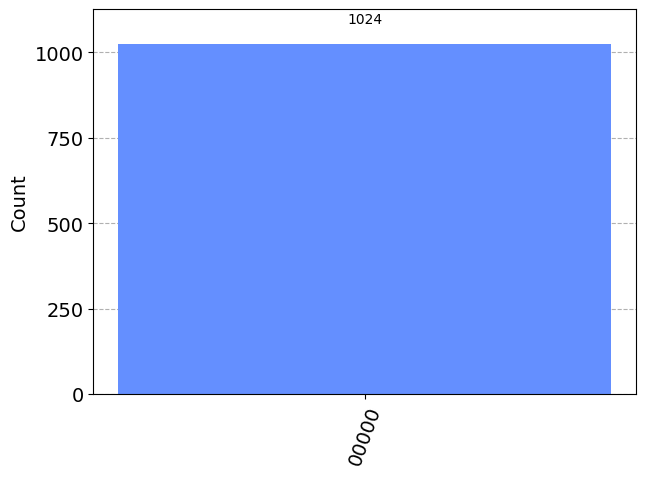

In [134]:
from qiskit import QuantumCircuit, Aer, execute

# Define the circuit
qc = QuantumCircuit(5, 5)

# Step 1: Initialize the qubits to |0>
qc.reset(range(5))

# Step 2: Encode the logical qubit
qc.cx(0, 2)
qc.cx(1, 2)
qc.cx(1, 3)
qc.cx(2, 4)

# Step 3: Apply a bit flip error to the third qubit
qc.x(2)

# Step 4: Measure the qubits and the syndrome bits
qc.cx(0, 2)
qc.cx(1, 2)
qc.cx(1, 3)
qc.cx(2, 4)
qc.measure(range(5), range(5))
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=1).result()
# Step 5: Correct the error based on the syndrome
syndrome = list(result.get_counts().keys())[0]
# print(syndrome)
if(syndrome=='10100'):
  qc.x(2)
  qc.x(4)
elif(syndrome=='10101'):
  qc.x(2)
  qc.x(4)
elif(syndrome=='11110'):
  qc.x(1)
  qc.x(2)
  qc.x(3)
  qc.x(4)
elif(syndrome=='01000'):
  qc.x(3)
elif(syndrome=='10000'):
  qc.x(4)




# Step 6: Measure the logical qubit
qc.cx(2, 4)
qc.cx(1, 3)
qc.cx(1, 2)
qc.cx(0, 2)
qc.measure(range(5), range(5))

# Run the circuit and print the result
result = execute(qc, backend=backend, shots=1024).result()

print(result.get_counts())
plot_histogram(result.get_counts())


The output of this code should be {'000': 1024} which indicates that the error has been corrected and the original state of the qubits has been restored.

#Surface Error Correcting code

Here's an example code for a simple 4-qubit surface code. This code encodes two logical qubits using four physical qubits and applies a single X error to one of the data qubits. Then, it measures the syndrome and applies an error correction operation based on the measured syndrome. Finally, it measures the two data qubits to extract the logical values.

{'00': 1024}


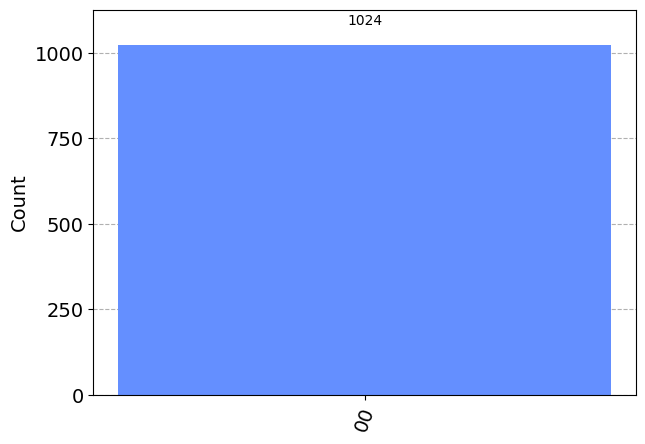

In [166]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

# Define the registers and the circuit
q = QuantumRegister(6, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

# Encoding circuit
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.cx(q[1], q[3])
qc.cx(q[0], q[3])
qc.barrier()

# Error
qc.x(q[1])
qc.barrier()

# Syndrome measurement
qc.cx(q[1], q[4])
qc.cx(q[2], q[4])
qc.cx(q[2], q[5])
qc.cx(q[3], q[5])
qc.measure(q[4], c[0])
qc.measure(q[5], c[1])

# Error correction
qc.x(q[0]).c_if(c, 0)
qc.x(q[1]).c_if(c, 1)
qc.x(q[2]).c_if(c, 0)
qc.x(q[3]).c_if(c, 1)

# Measure data qubits
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()

# Print the results
print(counts)
plot_histogram(result.get_counts())



#NEAT as an error correcting method

In what follows, we have a small example for a NEAT error correcting code on the simplest line lattice. 

In [169]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate, HGate, CXGate, CZGate
from qiskit.quantum_info import Pauli

# Define the stabilizer generators
S1 = Pauli(label='XXXXX')
S1 *= Pauli(label='ZZZZX')
S1 *= Pauli(label='YYZYY')
S1 *= Pauli(label='YYXYY')

S2 = Pauli(label='XXXXX')
S2 *= Pauli(label='XXXZZ')
S2 *= Pauli(label='XYYXY')

S3 = Pauli(label='XXXXX')
S3 *= Pauli(label='YYZZZ')
S3 *= Pauli(label='XXYXY')

S4 = Pauli(label='XXXXX')
S4 *= Pauli(label='XYYXY')
S4 *= Pauli(label='ZZXYZ')
S4 *= Pauli(label='YYZZZ')

# Create a five-qubit quantum register and a five-bit classical register
qreg = QuantumRegister(5)
creg = ClassicalRegister(5)

# Create a quantum circuit
qc = QuantumCircuit(qreg, creg)

# Add the stabilizer generators to the circuit
qc.append(S1.to_instruction(), [0, 1, 2, 3, 4])
qc.append(S2.to_instruction(), [0, 1, 2, 3, 4])
qc.append(S3.to_instruction(), [0, 1, 2, 3, 4])
qc.append(S4.to_instruction(), [0, 1, 2, 3, 4])

# Measure the qubits
qc.measure(qreg, creg)

# Draw the circuit
# qc.draw()

<ipython-input-169-c82ccee21350>:6: DeprecationWarning: The 'label' keyword argument of 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Pass the label positionally instead, such as 'Pauli("XYZ")'.
  S1 = Pauli(label='XXXXX')
<ipython-input-169-c82ccee21350>:7: DeprecationWarning: The 'label' keyword argument of 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Pass the label positionally instead, such as 'Pauli("XYZ")'.
  S1 *= Pauli(label='ZZZZX')
<ipython-input-169-c82ccee21350>:8: DeprecationWarning: The 'label' keyword argument of 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Pass the label positionally instead, such as 'Pauli("XYZ")'.
  S1 *= Pauli(label='YYZYY')
<ipython-input-169-c82ccee21350>:9: DeprecationWarning: The 'label' keyword argument of 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Pass the la

{'00000': 10}


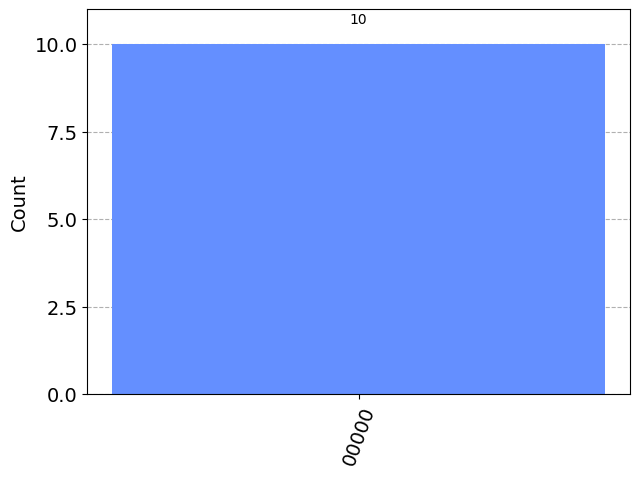

In [170]:
from qiskit import Aer, execute

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10)
result = job.result()
counts = result.get_counts(qc)

print(counts)
plot_histogram(result.get_counts())


In the [7,1,3] code that follows

{'0': 1024}


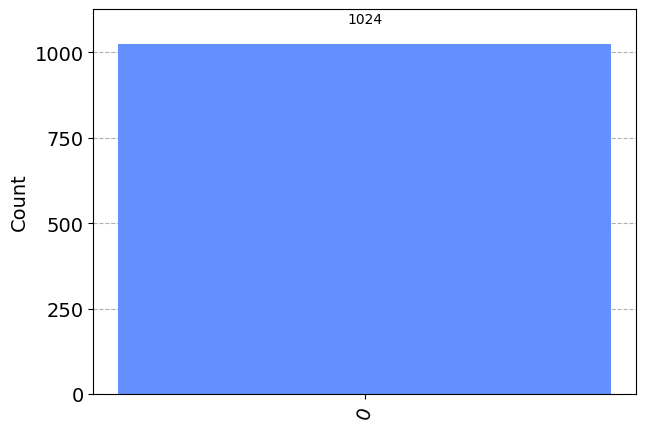

In [312]:
from qiskit import QuantumCircuit, Aer, execute

# Create the quantum circuit with 7 qubits and 7 classical register
qc = QuantumCircuit(7, 1)

# Apply a Hadamard gate to qubits 0, 1, 2.
qc.h(range(5))

# Define the logical operators for the [7,4] CSS code
X_L = [1, 0, 1, 0, 1, 0, 1]
Z_L = [0, 1, 1, 0, 0, 1, 1]

# Apply the X and Z logical operators to the code qubits
for i in range(3):
    if X_L[i] == 1:
        qc.x(i)
    if Z_L[i] == 1:
        qc.z(i)
# Add the error
qc.x(0)
# Apply a Hadamard gate to qubits 0, 1, 2.
qc.h(range(5))

# Measure the first qubit to extract the logical X operator
qc.measure(0, 0)

# Run the quantum circuit on the simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()

# Print the measurement results
print(result.get_counts(qc))
plot_histogram(result.get_counts())


And we get the expected result! 